In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
train=pd.read_csv('./Train/Train.csv').values


X=train[:,:5]
y=train[:,5:]

u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

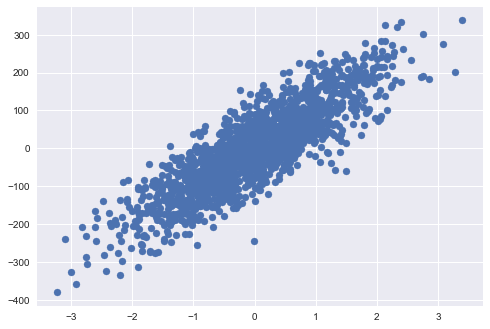

In [173]:
plt.style.use('seaborn')
plt.scatter(X[:,1],y)
plt.show()

In [177]:
X.shape,y.shape

((1600, 6), (1600,))

In [175]:
y=y.reshape((1600,))

In [176]:
one=np.ones((X.shape[0],1))
X=np.hstack((one,X))

In [112]:
def hypothesis(x,theta):
    y_=0.0
    n=x.shape[0]
    for i in range(n):
        y_+=(theta[i]*x[i])
    return y_

def error(X,y,theta):
    e=0.0
    m=X.shape[0]
    for i in range(m):
        y_=hypothesis(X[i],theta)
        e+=(y[i]-y_)**2
    return e/m

def gradient(X,y,theta):
    m,n=X.shape
    
    grad=np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-y[i])*X[i][j]
    
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_epochs):
        
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
            
    return theta,error_list

In [119]:
import time
start=time.time()
theta,error_list=gradient_descent(X,y)
end=time.time()
print("time taken is",end-start)

time taken is 36.324737548828125


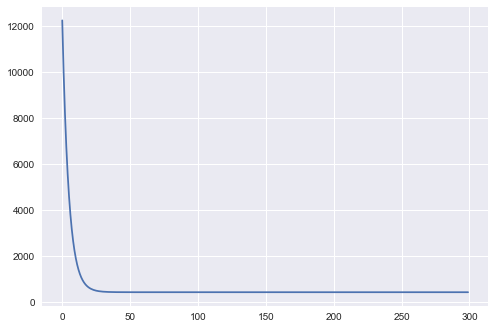

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


In [108]:
plt.plot(error_list)
plt.show()
print(theta)

In [178]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e=0.0
    y_=hypothesis(X,theta)
    e=np.sum((y-y_)**2)
    m=X.shape[0]
    
    return e/m

def gradient(X,y,theta):
    
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta - learning_rate*grad
    
    return theta,error_list
    

In [134]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.01911163330078125


In [158]:
theta

array([ 0.31883538, 29.59359198, 94.65067706,  8.37544469, 45.52303635,
        2.46461552])

In [136]:
x_test=pd.read_csv('./Test/Test.csv').values
print(x_test.shape)

(400, 5)


In [141]:
one=np.ones((x_test.shape[0],1))
x_test=np.hstack((one,x_test))

In [142]:
print(x_test.shape)

(400, 6)


In [144]:
y_test=hypothesis(x_test,theta)

In [148]:
df=pd.DataFrame(data=y_test,columns=['target'])

In [150]:
df.to_csv('y_prediction.csv',index_label='Id')

# finding r2 score

In [169]:
y_ = []
m=X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [170]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [171]:
r2_score(y,y_)

-314475.03471958207